In [79]:

import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter 

In [80]:
t, m, g=smp.symbols('t m g') 


In [81]:
the=smp.symbols(r'\theta', cls=smp.Function) #defining theta symbol as a FUNCTION

In [82]:
the=the(t) #Definining Theta as a function t !!!!!!!

In [83]:
the_d=smp.diff(the,t)

In [84]:
the_dd=smp.diff(the_d,t)

In [85]:
the_dd

Derivative(\theta(t), (t, 2))

In [86]:
x, y= smp.symbols('x y', cls=smp.Function)

In [87]:
x=x(the)
y=y(the)

In [88]:
path= 'trig'        
if path=='trig':
    x=2.5*smp.sin(the)  #pick any x and y you want
    y=2.5*smp.cos(the)
    x_f= smp.lambdify(the,x)
    y_f= smp.lambdify(the,y)  #lambdify is just to make them take numerical values
    

In [89]:
T=1/2*m*(smp.diff(x,t)**2 + smp.diff(y,t)**2)
V=m*g*y
L= T -V


In [90]:
LE=smp.diff(L,the)-smp.diff(smp.diff(L,the_d),t) #Lagrange equation =0 
LE=LE.simplify()


In [91]:
deriv_2= smp.solve(LE, the_dd)[0]  #To solve higher order ODE's analytically, we need to make it into system of ODEs
deriv_1=the_d                      

In [92]:
deriv_2

0.4*g*sin(\theta(t))

In [93]:
deriv2_f = smp.lambdify((g, the, the_d), deriv_2) #the''=....
deriv1_f = smp.lambdify(the_d,the_d) #the'=the'

$S= (\theta , \omega) $

In [94]:
deriv_1

Derivative(\theta(t), t)

In [95]:
def dSdt(S, t):
    return [deriv1_f(S[1]), #dthe/dt
            deriv2_f(g,S[0],S[1]) #domege/dt      #S[0] is theta and S[1] is omega
           ]


In [96]:
t= np.linspace(0, 20, 1000)
g=9.81
ans1= odeint( dSdt , y0=[np.pi/4, np.pi], t=t)#y0 are initial conditions for theta and omega repectively
ans2= odeint( dSdt , y0=[np.pi/3,np.pi], t=t) #different initial cond

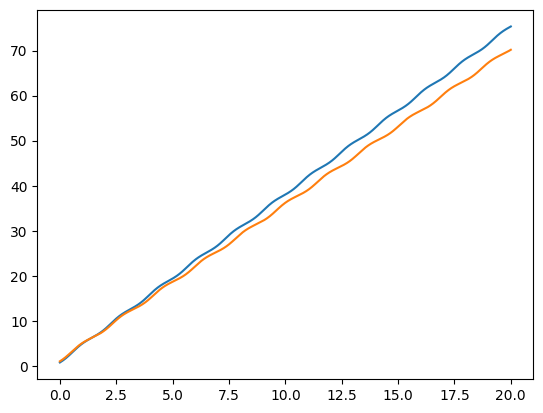

In [97]:
plt.plot(t, ans1.T[0])
plt.plot(t, ans2.T[0])

In [98]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

In [99]:
x1,y1 = get_xy(ans1.T[0])
x2,y2 = get_xy(ans2.T[0])

In [ ]:
def animate(i):
    ln1.set_data([x1[i]],[y1[i]])
    ln2.set_data([x2[i]],[y2[i]])

fig, ax= plt.subplots(1,1)
ax.grid()
ln1, =plt.plot([],[], 'ro')
ln2, =plt.plot([],[], 'ro')
ax.set_ylim(-1,16)
ax.set_xlim(-4,4)
ani =animation.FuncAnimation(fig,animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=50)